In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import pandas as pd

file_path = 'penguins.csv'
penguins_data = pd.read_csv(file_path)

penguins_data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007


有缺失值,需要进一步处理
NA

数据集包含了关于企鹅的几个特征：

1. rowid：数据行的编号。
2. species：企鹅的种类，如Adelie。
3. island：企鹅所在的岛屿名称。
4. bill_length_mm：企鹅喙的长度，以毫米为单位。
5. bill_depth_mm：企鹅喙的深度，以毫米为单位。
6. flipper_length_mm：企鹅鳍状肢的长度，以毫米为单位。
7. body_mass_g：企鹅的体重，以克为单位。
8. sex：企鹅的性别。
9. year：数据收集的年份。


目前的数据集已经经过清洗
1. 将NA值所在行删除
2. 将无关变量：序号删除

In [3]:
new_file_path = 'penguins.csv'
cleaned_penguins_data = pd.read_csv(new_file_path)

categorical_columns = ['species', 'island', 'sex']
penguins_data_numeric = pd.get_dummies(cleaned_penguins_data, columns=categorical_columns)

penguins_data_numeric.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181,3750,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186,3800,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195,3250,2007,True,False,False,False,False,True,True,False
3,36.7,19.3,193,3450,2007,True,False,False,False,False,True,True,False
4,39.3,20.6,190,3650,2007,True,False,False,False,False,True,False,True


定类变量转换为数字。我
species_Adelie	species_Chinstrap	species_Gentoo	
island_Biscoe	island_Dream	island_Torgersen	
sex_female	sex_male
现在数据集包括以下列：
- 喙的长度（bill_length_mm）
- 喙的深度（bill_depth_mm）
- 鳍状肢的长度（flipper_length_mm）
- 体重（body_mass_g）
- 数据收集年份（year）
- 种类（species_Adelie, species_Chinstrap, species_Gentoo）
- 岛屿（island_Biscoe, island_Dream, island_Torgersen）
- 性别（sex_female, sex_male）


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = penguins_data_numeric.drop(['species_Adelie', 'species_Chinstrap', 'species_Gentoo'], axis=1)
y = penguins_data_numeric[['species_Adelie', 'species_Chinstrap', 'species_Gentoo']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

dt_classifier.score(X_test, y_test)


0.98

模型的准确率达到98%

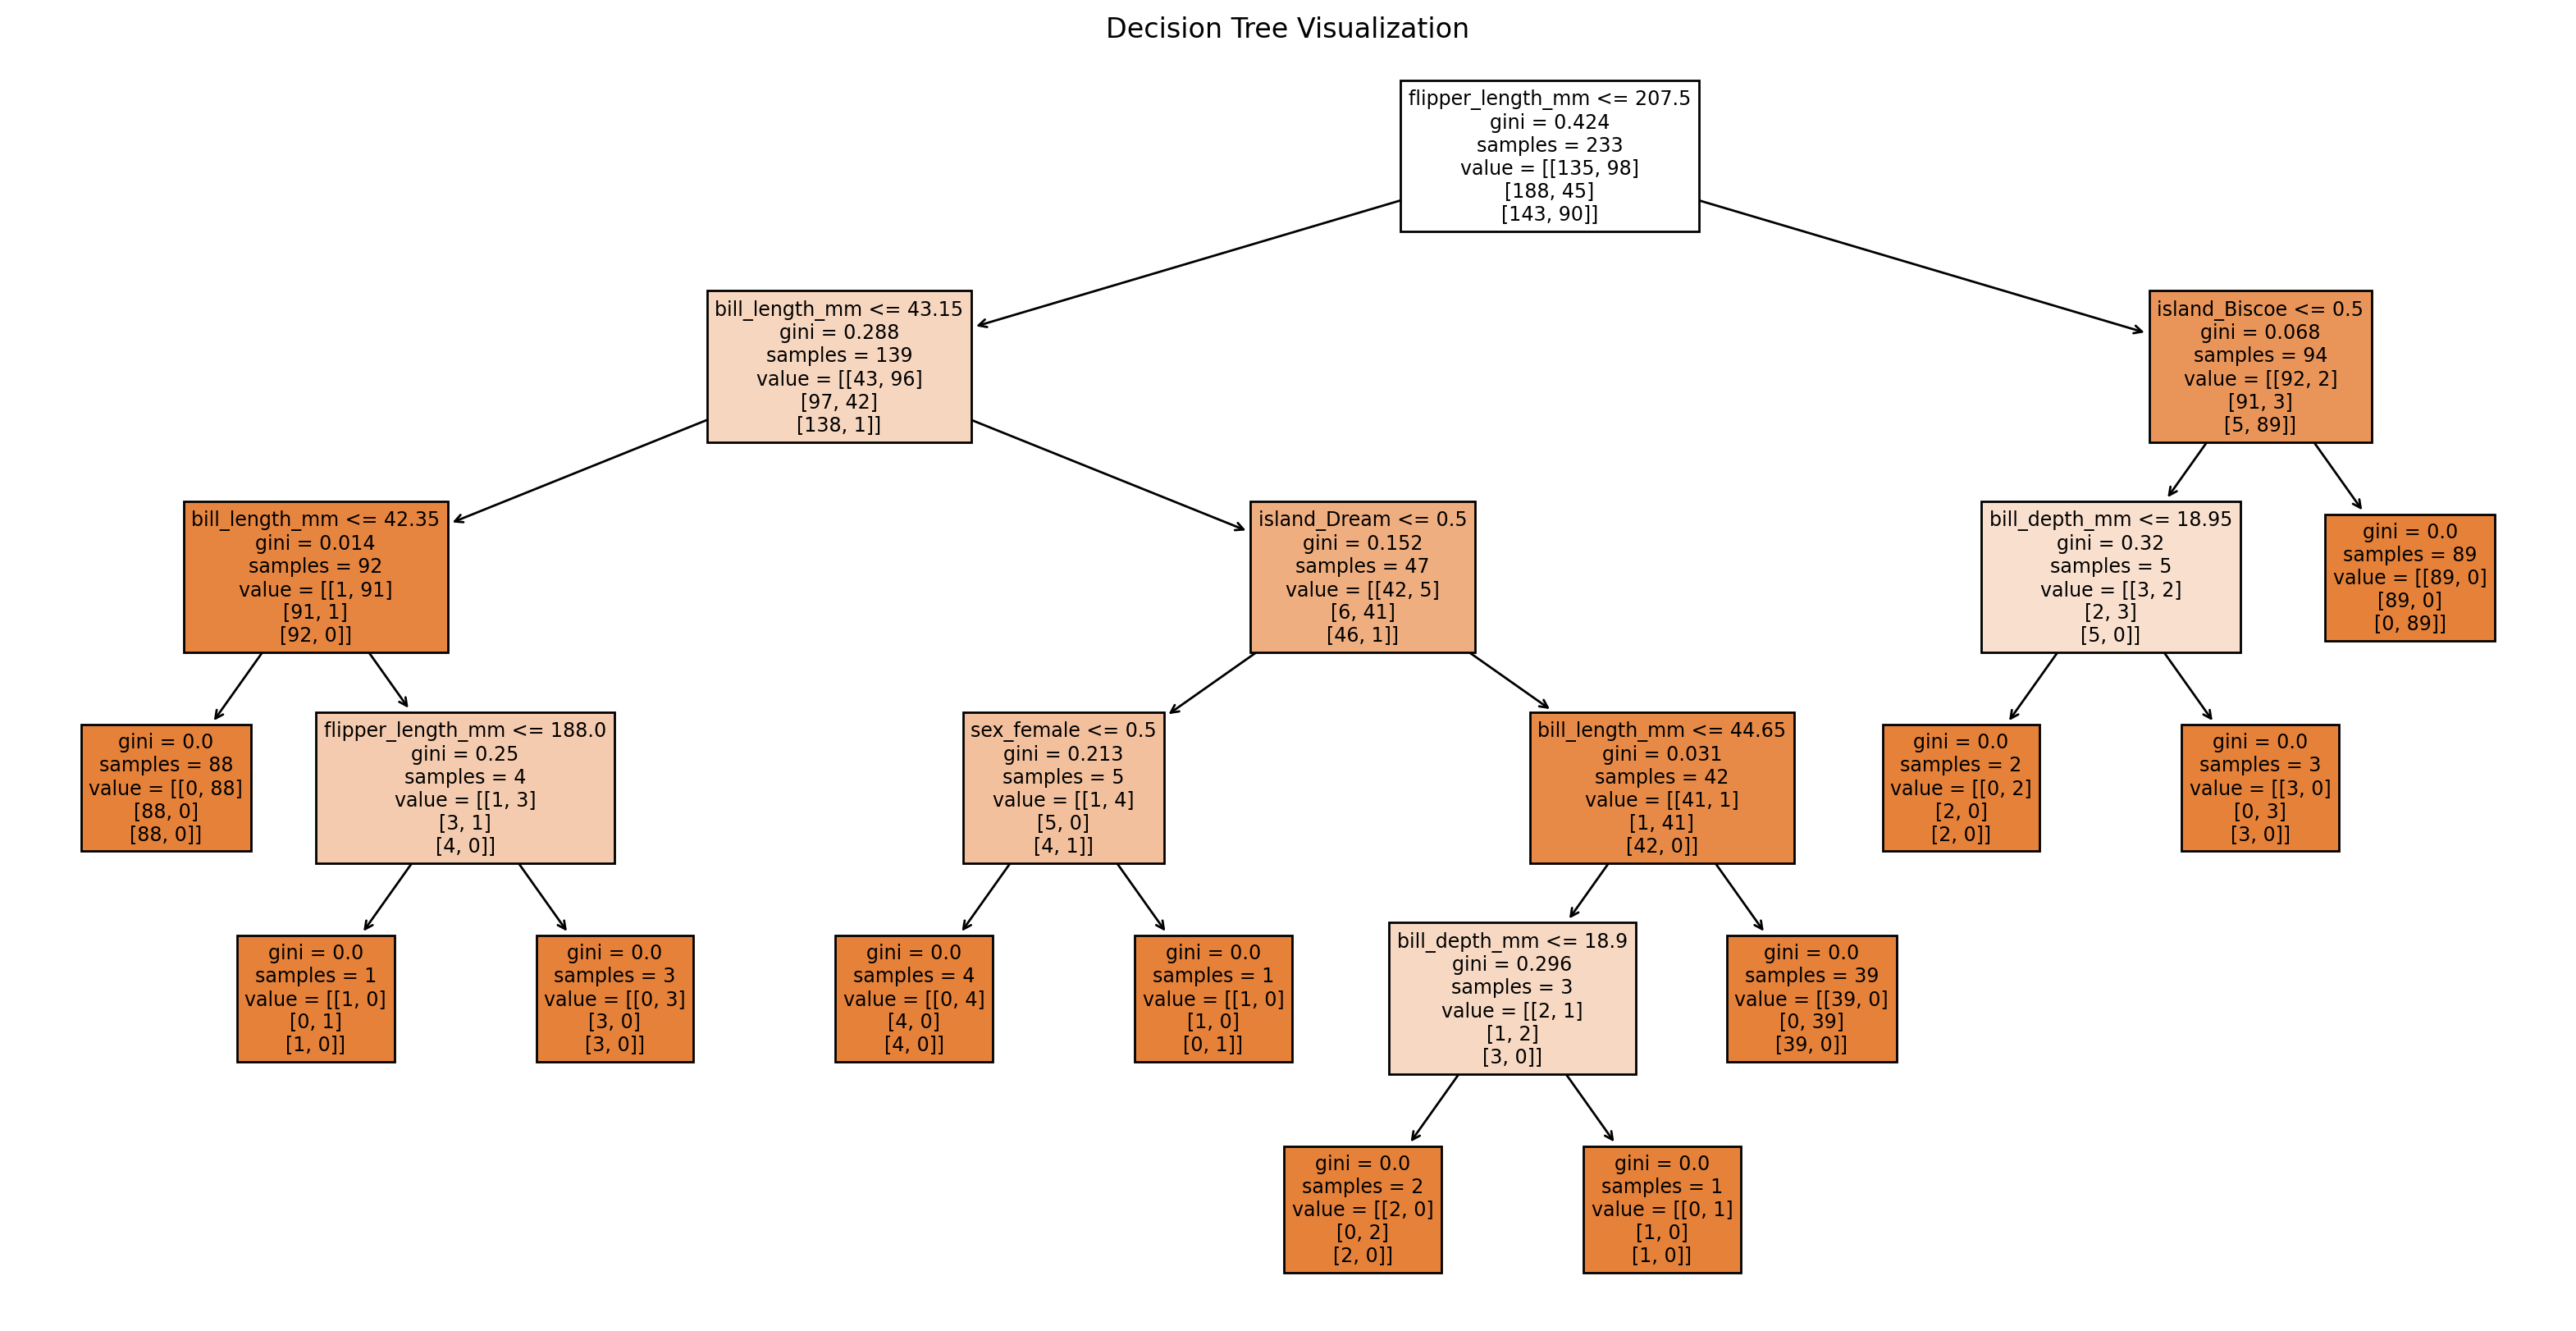

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, 
               feature_names=X.columns,  
               class_names=['Adelie', 'Chinstrap', 'Gentoo'],
               filled=True)
plt.title("Decision Tree Visualization")
plt.show()


混淆矩阵分析

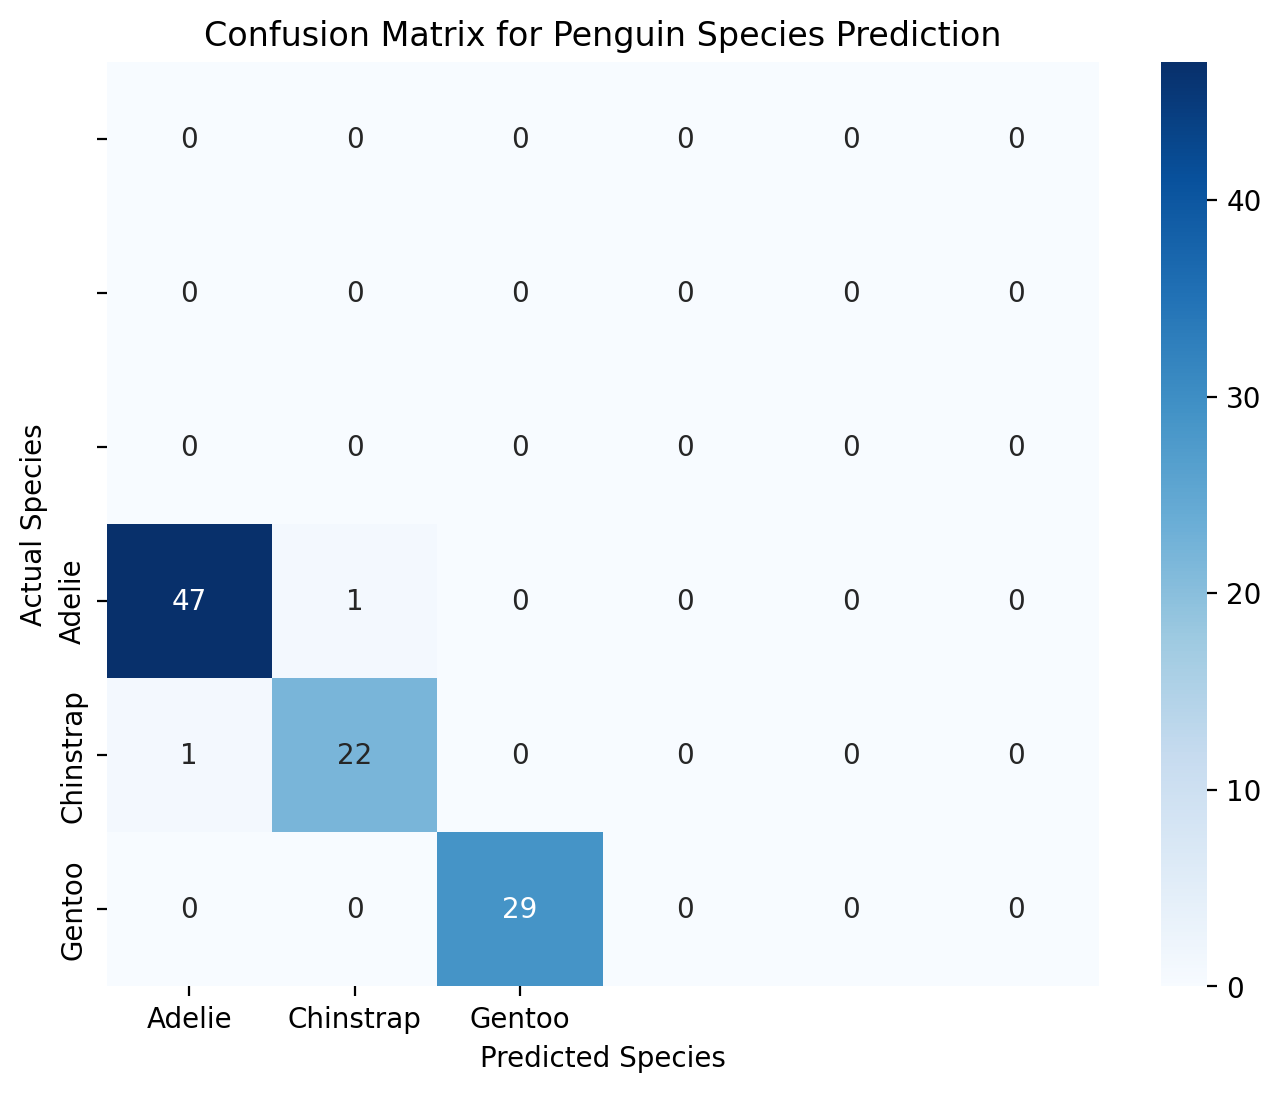

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = dt_classifier.predict(X_test)

predictions_df = pd.DataFrame(predictions, columns=['Adelie', 'Chinstrap', 'Gentoo'])
predictions_df = predictions_df.idxmax(axis=1)
y_test_species = y_test.idxmax(axis=1)

conf_matrix = confusion_matrix(y_test_species, predictions_df)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Adelie', 'Chinstrap', 'Gentoo'],
            yticklabels=['','','','Adelie', 'Chinstrap', 'Gentoo'])
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix for Penguin Species Prediction')
plt.show()


行代表实际的企鹅种类。
列代表模型预测的企鹅种类。
对角线上的数字表示正确预测的数量。
非对角线上的数字表示错误预测的数量。

散点图可视化

C:\Users\Naasi\AppData\Local\Temp\ipykernel_29764\2323857681.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=plot_df, x='bill_length_mm', y='flipper_length_mm', hue='Predicted Species', style='Predicted Species', palette='Set2', markers=['o', 's', 'X'], alpha=0.6, label='Predicted')


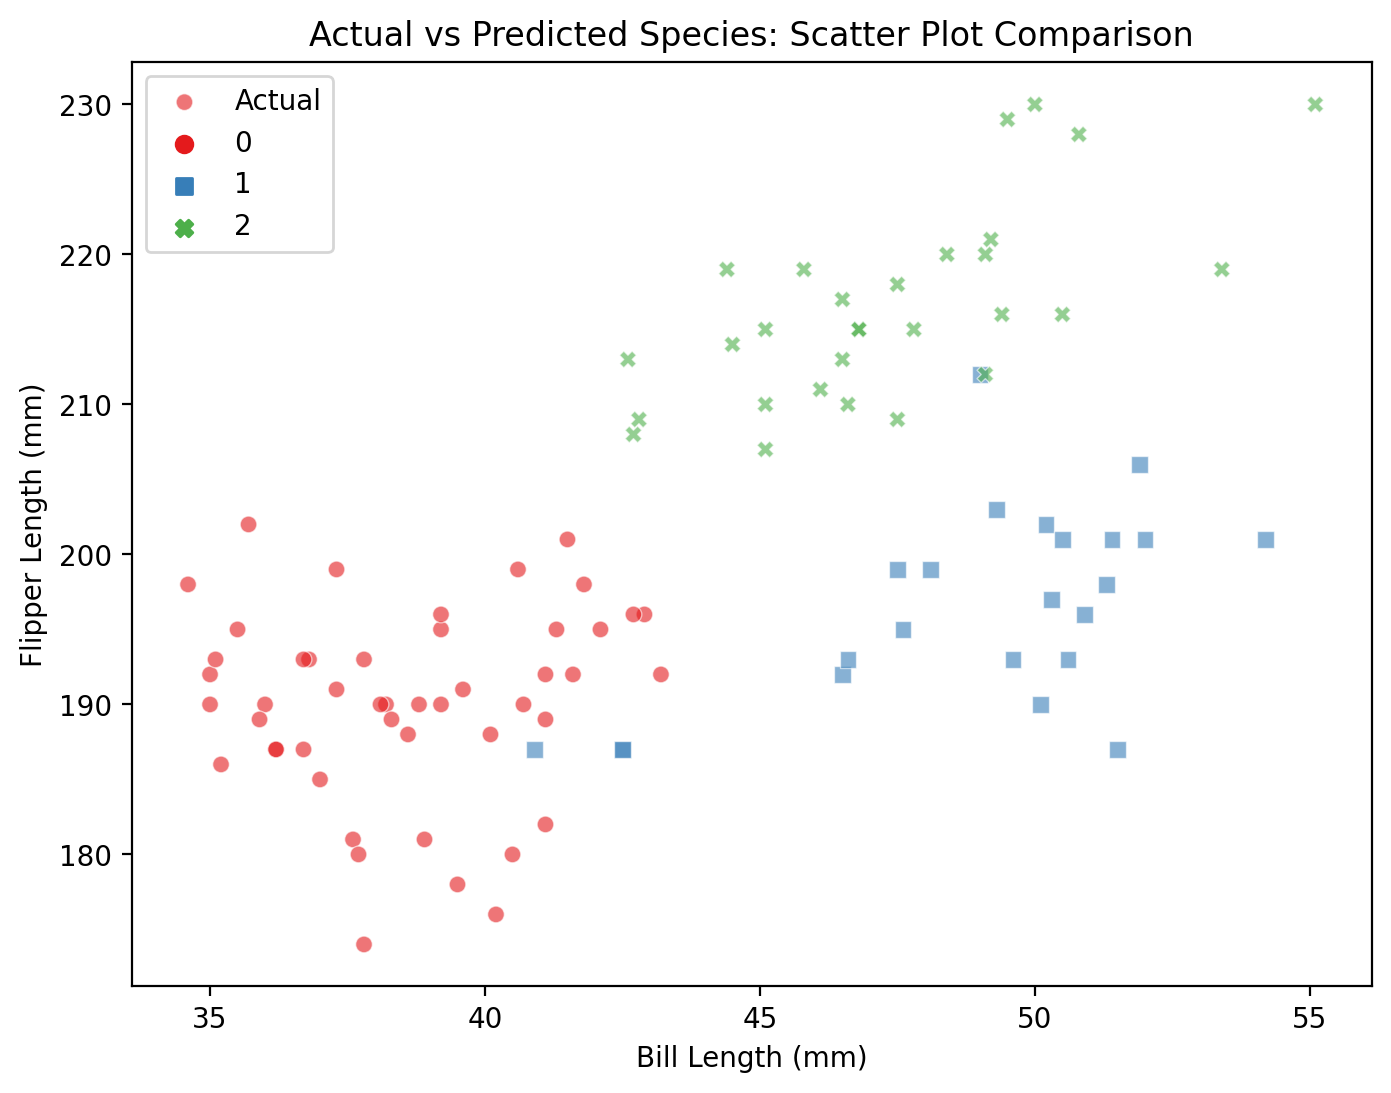

In [7]:
species_numeric_mapping = {'species_Adelie': 0, 'species_Chinstrap': 1, 'species_Gentoo': 2}
y_pred = dt_classifier.predict(X_test)

y_pred_df = pd.DataFrame(y_pred, columns=['Adelie_pred', 'Chinstrap_pred', 'Gentoo_pred'])
y_test_df = y_test.reset_index(drop=True)
y_test_numeric = y_test.idxmax(axis=1).map(species_numeric_mapping)
y_pred_numeric = y_pred_df.idxmax(axis=1).map(species_numeric_mapping)

plot_df = X_test.copy()
plot_df['Actual Species'] = y_test_numeric.values
plot_df['Predicted Species'] = y_pred_numeric.values

plt.figure(figsize=(8, 6))

sns.scatterplot(data=plot_df, x='bill_length_mm', y='flipper_length_mm', hue='Actual Species', style='Actual Species', palette='Set1', markers=['o', 's', 'X'], alpha=0.6, label='Actual')

sns.scatterplot(data=plot_df, x='bill_length_mm', y='flipper_length_mm', hue='Predicted Species', style='Predicted Species', palette='Set2', markers=['o', 's', 'X'], alpha=0.6, label='Predicted')

plt.title('Actual vs Predicted Species: Scatter Plot Comparison')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend()
plt.show()


实际种类（Actual Species）：用“o”、“s”和“X”标记表示，使用第一种颜色组（Set1）。
预测种类（Predicted Species）：也用“o”、“s”和“X”标记表示，但使用第二种颜色组（Set2）

保存数据集

In [8]:
import joblib

model_filename = 'decision_tree_penguin_classifier.joblib'
joblib.dump(dt_classifier, model_filename)

model_filename


'decision_tree_penguin_classifier.joblib'

测试用例 1:

Island: Biscoe
Bill Length (mm): 39.5
Bill Depth (mm): 17.4
Flipper Length (mm): 186
Body Mass (g): 3800
Sex: Female
Year: 2007
测试用例 2:

Island: Dream
Bill Length (mm): 46.0
Bill Depth (mm): 21.5
Flipper Length (mm): 194
Body Mass (g): 4200
Sex: Male
Year: 2009
测试用例 3:

Island: Torgersen
Bill Length (mm): 36.7
Bill Depth (mm): 19.3
Flipper Length (mm): 193
Body Mass (g): 3450
Sex: Female
Year: 2008